<a href="https://colab.research.google.com/github/Rohan5076/AIMLOPS/blob/main/Anil_M1_NB_MiniProject_1_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [ ]:
# Install CatBoost
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.3 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

Please refer to the [ReadMe](https://drive.google.com/file/d/1V5CAUlRwLNcQcIWfgCJhukYvRESi2cC2/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
df = pd.read_csv('/content/wa_fn_usec_hr_employee_attrition_tsv.csv')

In [ ]:
# Check the shape of dataframe.
df.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [ ]:
# Separate numerical and categorical columns
#numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
#categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_cols = [x for x in df.columns if pd.api.types.is_numeric_dtype(df[x])]
categorical_cols = [x for x in df.columns if pd.api.types.is_object_dtype(df[x])]

In [ ]:
# Display statistical description
# df.describe()
#df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

In [ ]:
from tabulate import tabulate

# Create a list to store the statistics
stats = []

# Iterating through each column
for col in numerical_cols:
    missing_values = df[col].isnull().sum()
    sample_count = df[col].count()
    data_type = df[col].dtype
    column_range = df[col].min(), df[col].max()
    stats.append([col, sample_count, missing_values, data_type, column_range])


# Display the statistics in tabular format
print("\nStatistical Description of each Feature:")
print(tabulate(stats, headers=["Column", "Sample Count", "Missing Values Count", "Data Type", "Range"]))



Statistical Description of each Feature:
Column                      Sample Count    Missing Values Count  Data Type    Range
------------------------  --------------  ----------------------  -----------  -------------
age                                 1470                       0  int64        (18, 60)
dailyrate                           1470                       0  int64        (102, 1499)
distancefromhome                    1470                       0  int64        (1, 29)
education                           1470                       0  int64        (1, 5)
employeecount                       1470                       0  int64        (1, 1)
employeenumber                      1470                       0  int64        (1, 2068)
environmentsatisfaction             1470                       0  int64        (1, 4)
hourlyrate                          1470                       0  int64        (30, 100)
jobinvolvement                      1470                       0  int64       

In [ ]:
from tabulate import tabulate

# Create a list to store the statistics
stats = []

# Iterating through each column
for col in categorical_cols:
    missing_values = df[col].isnull().sum()
    sample_count = df[col].count()
    data_type = df[col].dtype
    column_range = df[col].min(), df[col].max()
    stats.append([col, sample_count, missing_values, data_type, column_range])


# Display the statistics in tabular format
print("\nStatistical Description of each Feature:")
print(tabulate(stats, headers=["Column", "Sample Count", "Missing Values Count", "Data Type", "Range"]))


Statistical Description of each Feature:
Column            Sample Count    Missing Values Count  Data Type    Range
--------------  --------------  ----------------------  -----------  -----------------------------------------------------
attrition                 1470                       0  object       ('No', 'Yes')
businesstravel            1470                       0  object       ('Non-Travel', 'Travel_Rarely')
department                1470                       0  object       ('Human Resources', 'Sales')
educationfield            1470                       0  object       ('Human Resources', 'Technical Degree')
gender                    1470                       0  object       ('Female', 'Male')
jobrole                   1470                       0  object       ('Healthcare Representative', 'Sales Representative')
maritalstatus             1470                       0  object       ('Divorced', 'Single')
over18                    1470                       0  object    

In [ ]:
#Remove missing values
df.dropna(inplace=True)

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(.5, 6))
    sns.boxplot(y=df[col], orient='h' , fill=False, linewidth=.6)
    plt.title(f"Boxplot of {col}")
    #plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
    plt.show()

NameError: name 'numerical_cols' is not defined

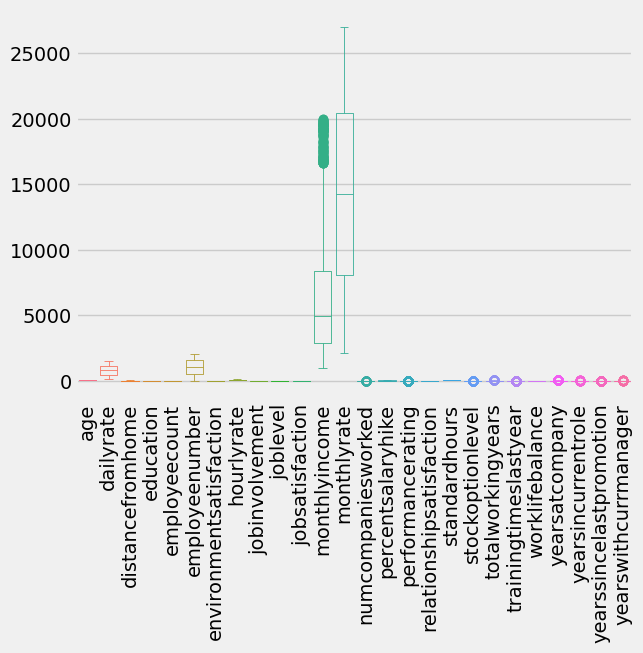

In [ ]:
# Check for outliers
sns.boxplot(data=df,orient='v',fill=False, linewidth=.6)
plt.xticks(rotation=90)
plt.show()

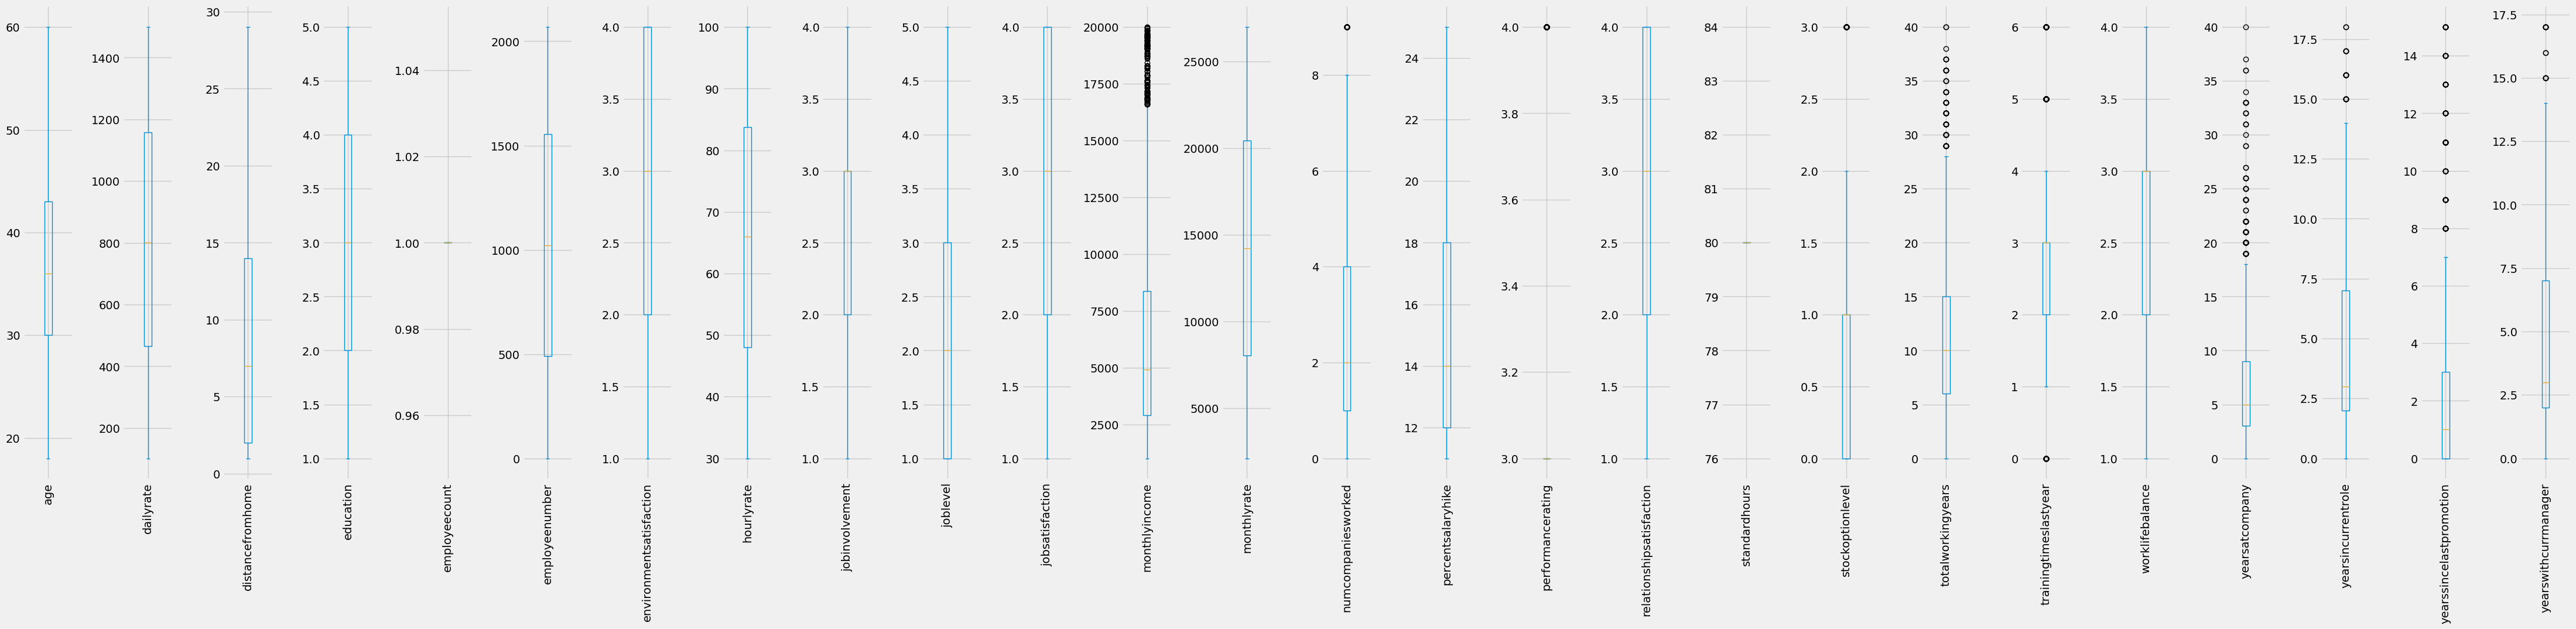

In [ ]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(50, 10),
    rot=90
)

# increase spacing between subplots
plt.subplots_adjust(wspace=1.0)
plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
#numeric_columns = df.select_dtypes(include='number').columns

# Iterate through each numerical column and find outliers
outliers = {}
for col in numerical_cols:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Find outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print the outliers for each numerical column
print("Outliers : ")
for col, outlier_values in outliers.items():
  if not outlier_values.empty:
    print(f"'{col}': {outlier_values.tolist()}")

Outliers : 
'monthlyincome': [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
'numcompaniesworked': [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [ ]:
from scipy import stats
# Z-score
outliers = {}
for col in numerical_cols:
    z_scores = stats.zscore(df[col])
    threshold = 3  # Define the threshold for Z-score (commonly 2 or 3)
    outlier_mask = abs(z_scores) > threshold
    outliers[col] = df[outlier_mask][col]


for col, outlier_values in outliers.items():
  if len(outlier_values) > 0 :
    print(f"'{col}': {outlier_values.tolist()}")

'totalworkingyears': [37, 38, 40, 36, 37, 36, 37, 40, 35, 36, 36, 35, 36, 36, 37, 35]
'yearsatcompany': [27, 37, 40, 33, 33, 36, 29, 27, 31, 32, 34, 26, 31, 31, 26, 32, 26, 33, 29, 33, 32, 33, 36, 26, 30]
'yearsincurrentrole': [16, 18, 18, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16]
'yearssincelastpromotion': [15, 13, 12, 12, 15, 15, 15, 12, 15, 13, 12, 15, 13, 12, 14, 13, 14, 15, 15, 13, 13, 15, 13, 15, 14, 15, 15, 15, 12, 14, 13, 13, 12, 14, 14, 14, 12, 13, 14, 14, 12, 12]
'yearswithcurrmanager': [17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 17, 17, 16]


In [ ]:
# Recheck for outliers
# YOUR CODE HERE

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
print(df.attrition.unique())

['Yes' 'No']


In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE

Number of employees who left: 237
Number of employees who stayed: 1233


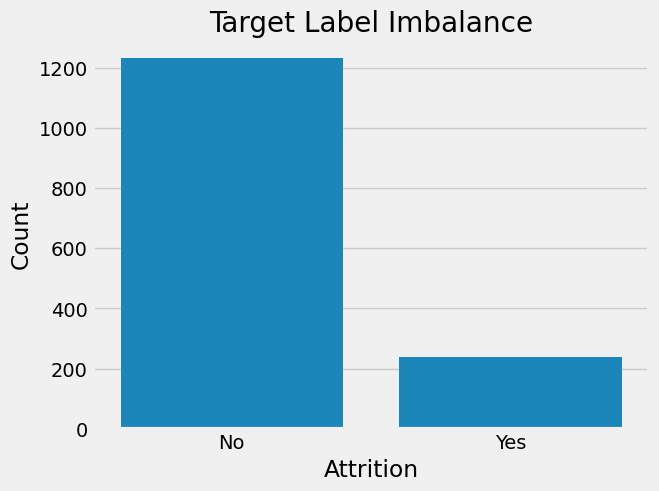

In [ ]:
# Check for target label imbalance
target_count = df['attrition'].value_counts()
print(f"Number of employees who left: {target_count['Yes']}")
print(f"Number of employees who stayed: {target_count['No']}")

# Plot barplot to visualize balance/imbalance
sns.barplot(x=target_count.index, y=target_count.values)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Target Label Imbalance")
plt.show()

# If there is an imbalance, you can use techniques such as SMOTE, cross-validation, or regularizing the model's parameters to address it.


If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [ ]:
numerical_cols

['age',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'standardhours',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

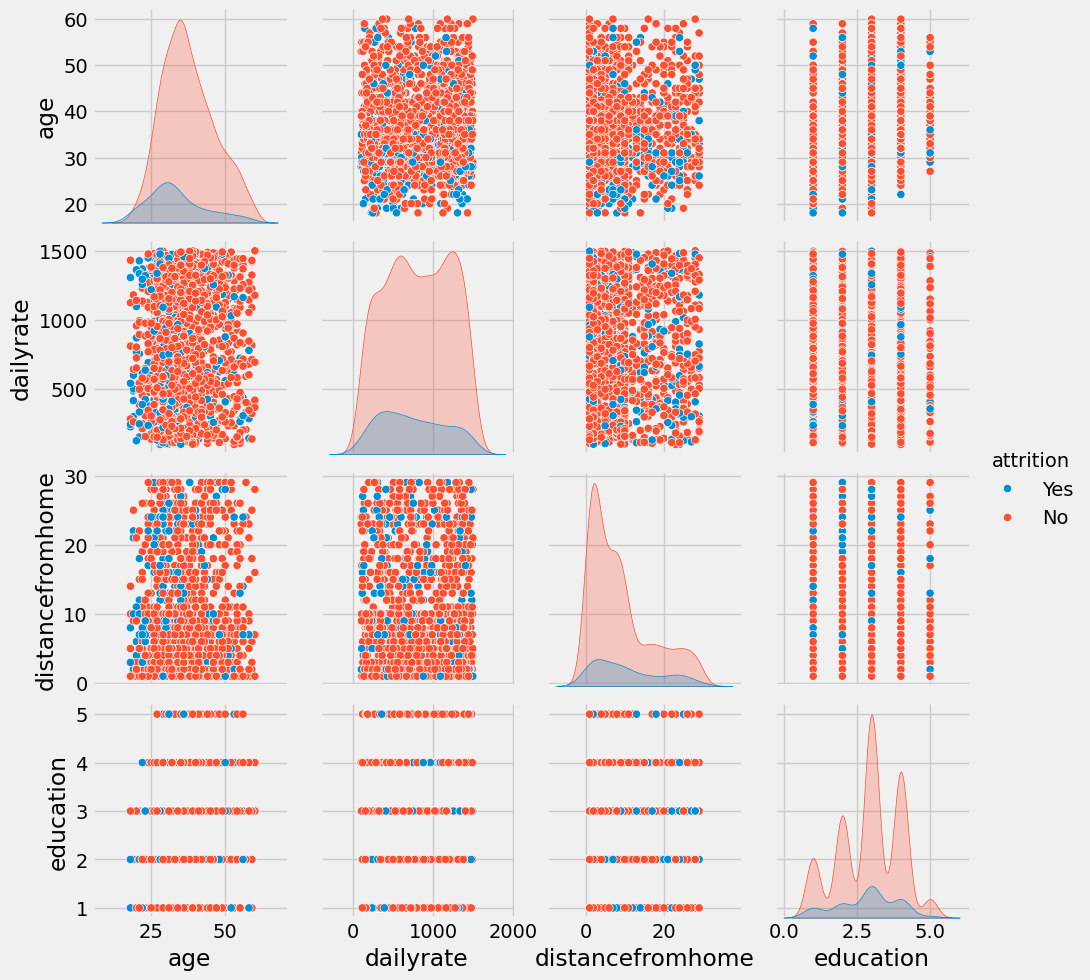

In [ ]:
# prompt: Visualize a pairplot with relevant features using sns.pairplot

# Create pairplot with hue as attrition
sns.pairplot(data=df[['age',
 'dailyrate','distancefromhome',
 'education','attrition']], hue='attrition')
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

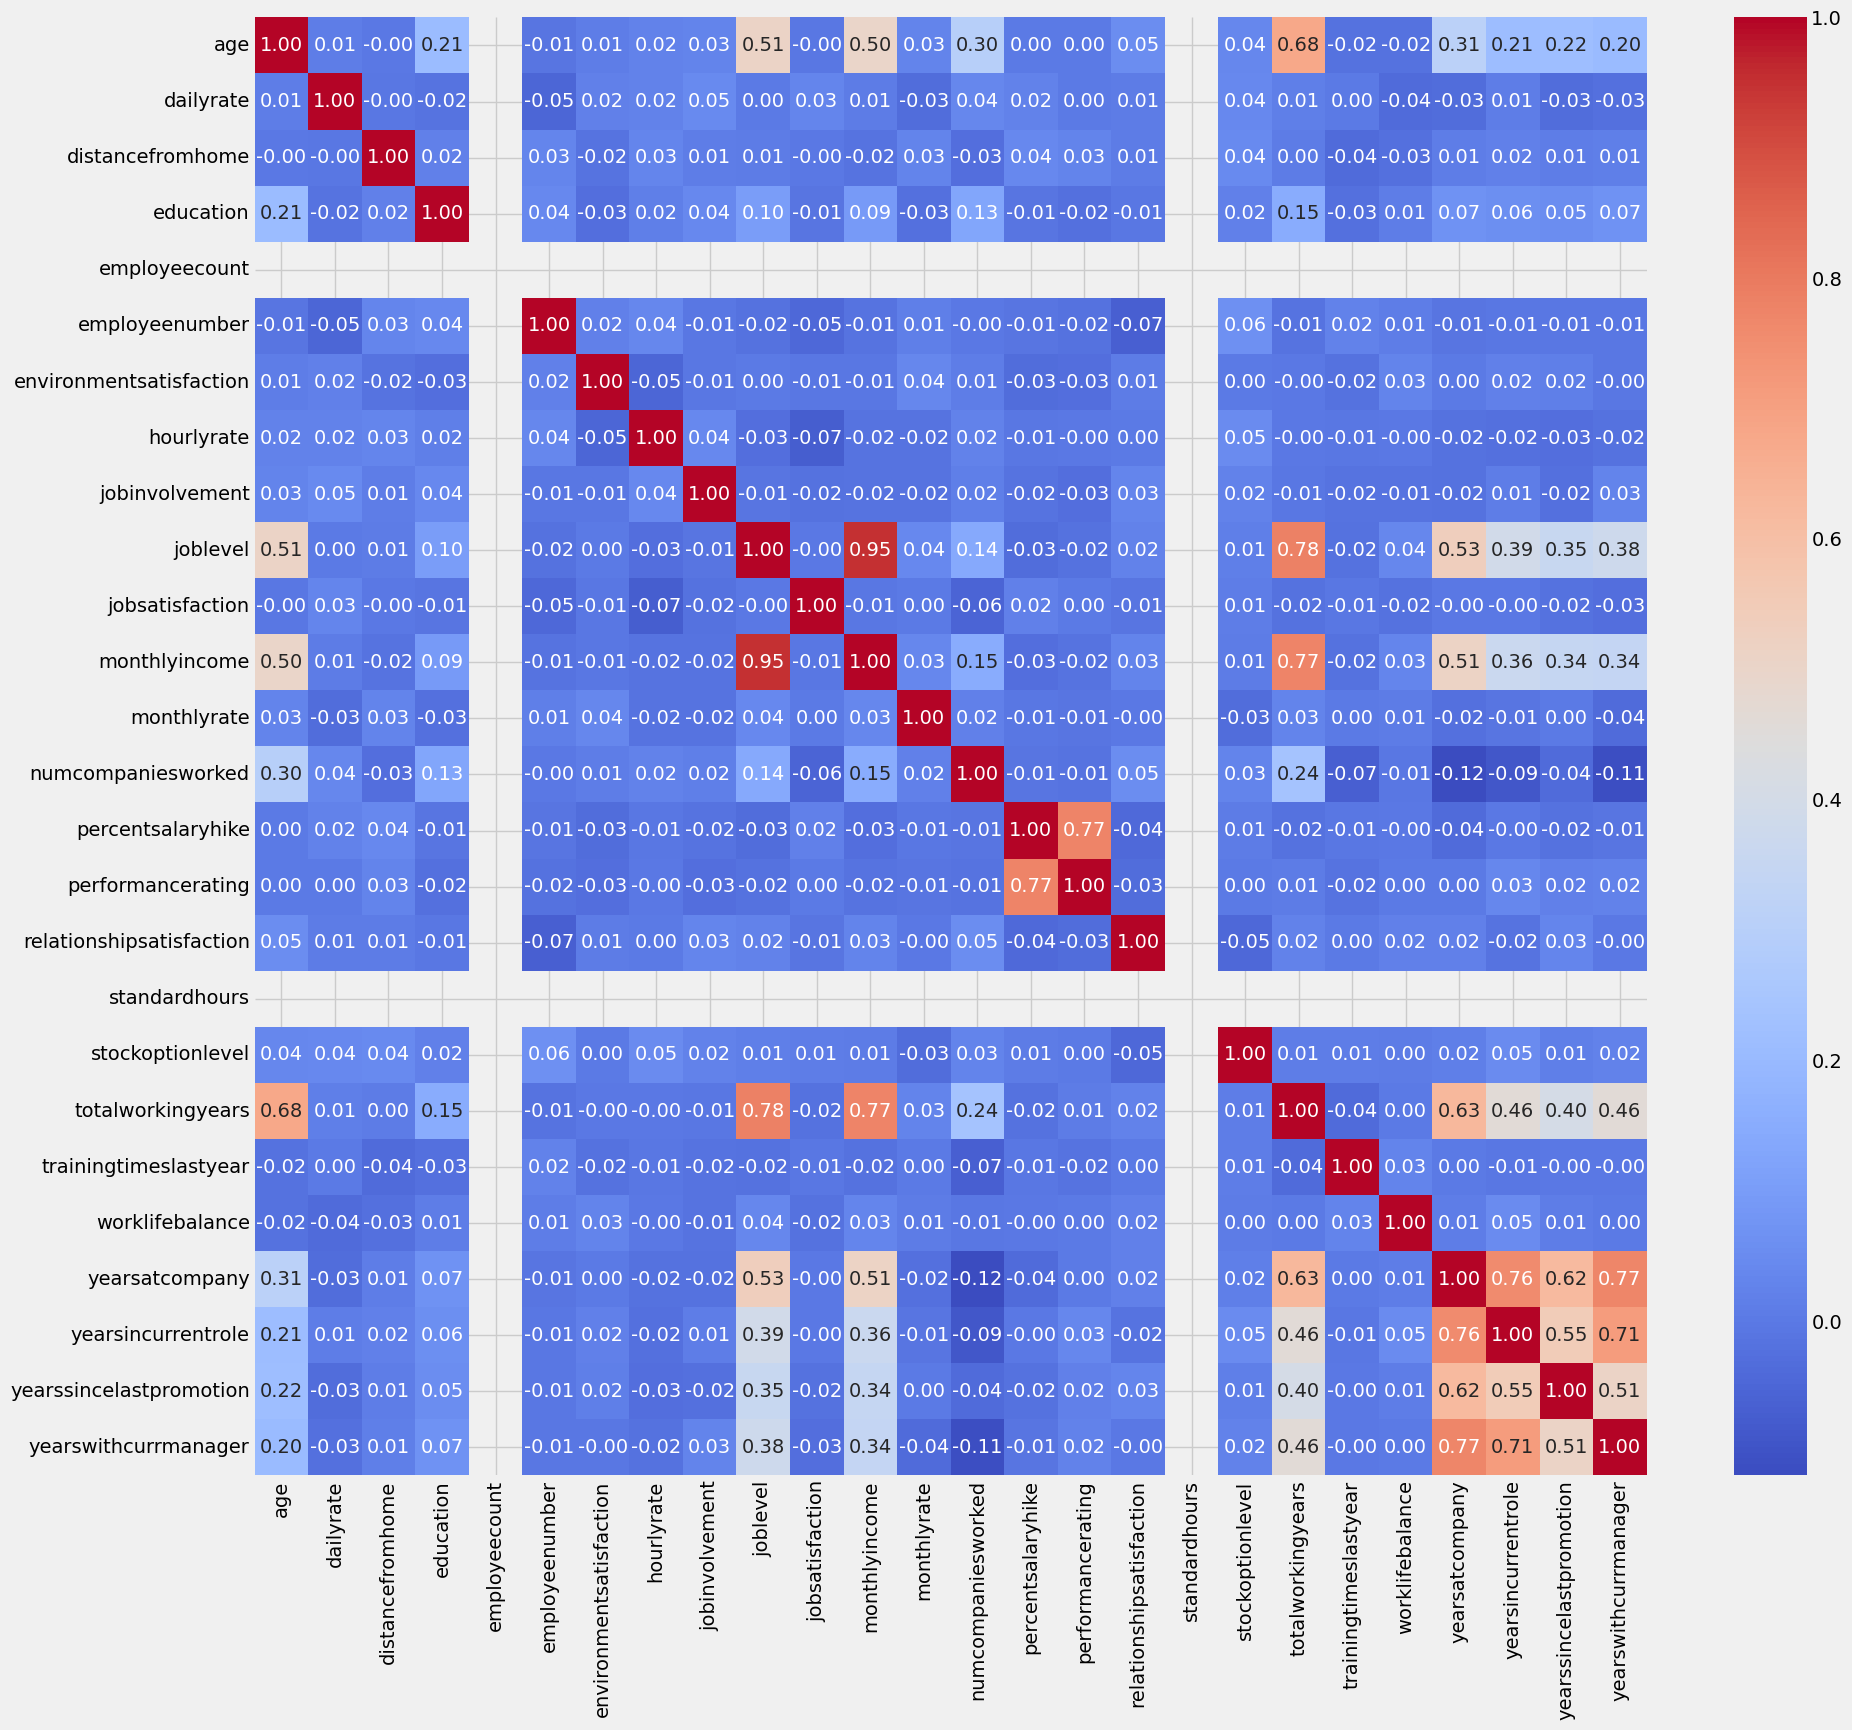

In [ ]:
# Visualize heatmap
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
# YOUR CODE HERE

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
# YOUR CODE HERE

In [ ]:
# Target Column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
# YOUR CODE HERE

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create XGBoost classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model Performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/